<a href="https://colab.research.google.com/github/ravikduvvuri/PracticalApplication2_DriversOfCarPrices/blob/main/RD_PracticalApplication2_DriversOfCarPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The question is **"what drives the price of a car?"**. Our business interest is to identify the attributes of a used car that are valued by the consumers.

The used car buyer is aware that the car he/she plans to buy is not a brand new car but they typically to look for few factors like numerical features like **milege or model year** etc. and categorical features like **color, make, condition** etc so as to assess the value and decide how much price to pay for a car.

As a Data Scientist, my job is to identify such features based on exisitng data and identify a model that can predict the price and help the used-car dealer to adjust and align their inventory for better business outcomes.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To understand the data, I did the following:

**Initial steps done**
1. Imported relevant libraries (Updated this section as needed in future)   
2. Read 'vehicles.csv' into a pandas dataframe
3.   Displayed sample data using df.sample(5) to see what features are there in the dataset
4.   Gained some domain knowledge and checked data and possible relationships among them

**Next Steps done**
5. Using df.info() found the total features, size of the dataset and data types of features
6. Searched for duplicate data
7. Identified 'not relevant data' (ex. 'Id', 'VIN' etc.)
8. Identified 'missing data' and plotted it

In [1]:
# Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle, seed
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
59068,7312040168,santa barbara,3000,2002.0,mercedes-benz,benz c320,good,6 cylinders,gas,158000.0,clean,automatic,NaN,rwd,NaN,sedan,NaN,ca
92145,7315853232,daytona beach,32990,2018.0,ram,1500 quad cab harvest pickup,good,6 cylinders,gas,29979.0,clean,other,1C6RR7GG9JS229010,4wd,NaN,pickup,black,fl
96381,7305700626,ft myers / SW florida,34990,2009.0,NaN,Maserati GranTurismo Coupe 2D,good,NaN,other,35891.0,clean,other,ZAMGJ45A690042895,rwd,NaN,coupe,NaN,fl
44216,7315434686,palm springs,51900,2018.0,bmw,750i,excellent,8 cylinders,gas,54000.0,clean,automatic,WBA7F0C52JGM23317,NaN,NaN,other,NaN,ca
64958,7311995941,stockton,28997,2007.0,NaN,HUMMER H2,NaN,NaN,gas,94990.0,clean,automatic,5GRGN23U47H104124,4wd,NaN,SUV,blue,ca


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180703 entries, 0 to 180702
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            180703 non-null  int64  
 1   region        180703 non-null  object 
 2   price         180703 non-null  int64  
 3   year          179935 non-null  float64
 4   manufacturer  172708 non-null  object 
 5   model         178459 non-null  object 
 6   condition     108541 non-null  object 
 7   cylinders     106487 non-null  object 
 8   fuel          179704 non-null  object 
 9   odometer      178612 non-null  float64
 10  title_status  177328 non-null  object 
 11  transmission  179711 non-null  object 
 12  VIN           113394 non-null  object 
 13  drive         124756 non-null  object 
 14  size          51825 non-null   object 
 15  type          142662 non-null  object 
 16  paint_color   127491 non-null  object 
 17  state         180702 non-null  object 
dtypes: f

In [4]:
#duplicate data check
df.duplicated().sum()
#Found no duplicates

0

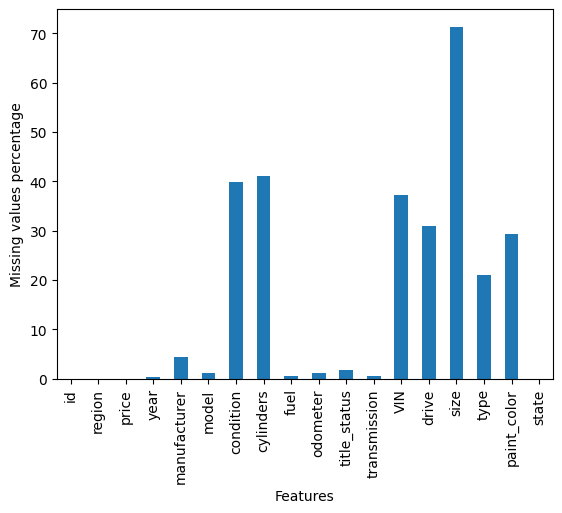

In [5]:
#Missing data check
df_missing = df.isnull().sum()/df.shape[0]*100
df_missing.plot.bar()
plt.xlabel('Features')
plt.ylabel('Missing values percentage')
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
# Based on data analyis, I did the following:

# Converted Features like 'year', 'odometer' into integers
# Dropped 'Id', 'VIN' as they are not useful for price prediction.
# Dropped 'Size' feature since 70% of data is missing, so it is not useful to fill-in with any existing data.
# Using mode(), Filled-in missing values in other categorical features (condition,cylinders,drive,type,paint_color)
# Removed null value rows since the null data is less than 5 percent for all other features (namely 'year', 'manufacturer','model','fuel','odometer','title_status','transmission' etc.)
# Removed zero values of 'odometer', 'price'

In [6]:
#Drop
df.drop(columns=['id','VIN','size'],inplace=True)

#Fill-in with mode()
df.fillna({'condition':df['condition'].mode()[0],'cylinders':df['cylinders'].mode()[0],'drive':df['drive'].mode()[0],'type':df['type'].mode()[0],'paint_color':df['paint_color'].mode()[0]},inplace=True)

#Drop null value data
df.dropna(inplace=True)

#Convert
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

#Remove zero values
df = df.query('odometer != 0 and price !=0')
df.describe()

,price,year,odometer
count,1.527550e+05,152755.000000,1.527550e+05
mean,5.571827e+04,2011.347124,9.630442e+04
std,8.838944e+06,8.889275,1.962069e+05
min,1.000000e+00,1900.000000,1.000000e+00
25%,7.800000e+03,2008.000000,3.828200e+04
50%,1.590000e+04,2013.000000,8.502500e+04
75%,2.717700e+04,2017.000000,1.329240e+05
max,3.024942e+09,2022.000000,1.000000e+07


In [8]:
#Removed outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        df['z_score'] = (df[col] - df[col].mean()) / df[col].std()
        df = df[df['z_score'].abs() <= threshold]
        df = df.drop(columns=['z_score'])
    return df

# Remove outliers from columns
df = remove_outliers_zscore(df,['year','odometer','price'])

In [16]:
# Dropped additional outlier data
df = df.query('odometer < 150000 & odometer >10000')
df = df.query('year > 2005')
df = df.query('price < 45000 & price > 6500')

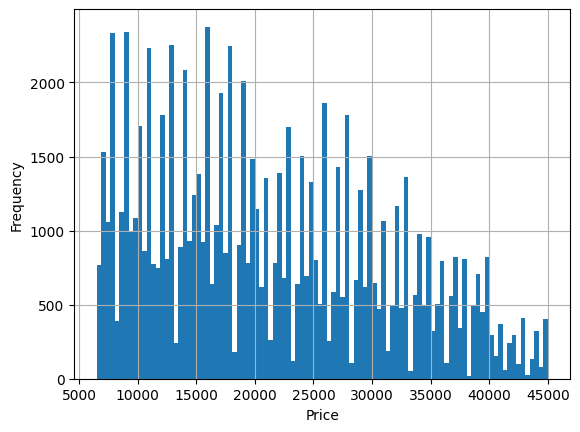

In [17]:
# Checked price distribution after outliers removal
df['price'].hist(bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Clean dataframe: df
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,4wd,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,4wd,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,4wd,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,4wd,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al


In [19]:
#Numeric Dataframe: df_numeric
#Numeric data only to be used in linear regression ('year', 'odometer' and 'price' as target)
df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,price,year,odometer
27,33590,2014,57923
28,22590,2010,71229
29,39590,2020,19160
30,30990,2017,41124
31,15000,2013,128000


##Plots of clean data

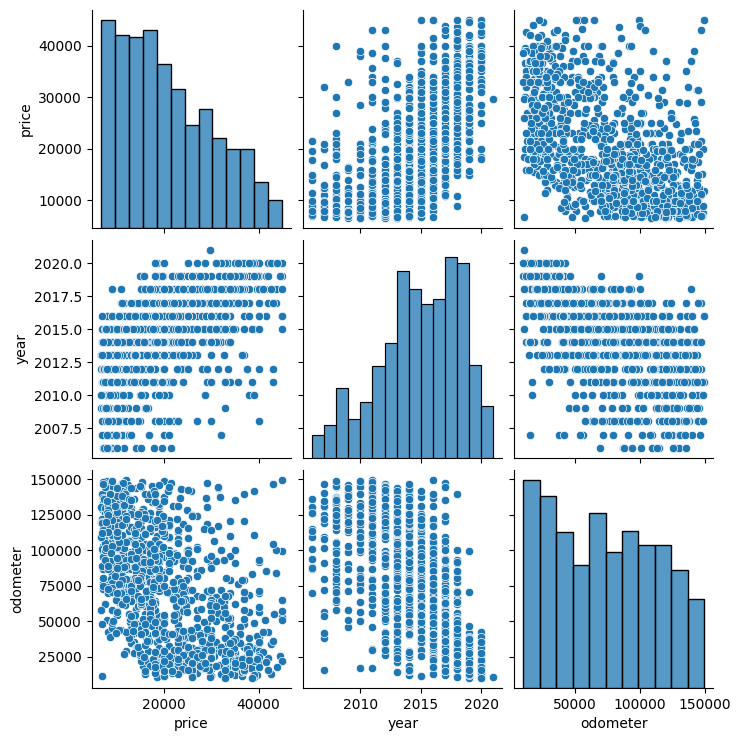

In [22]:
sns.pairplot(df_numeric.sample(1000))
plt.show()

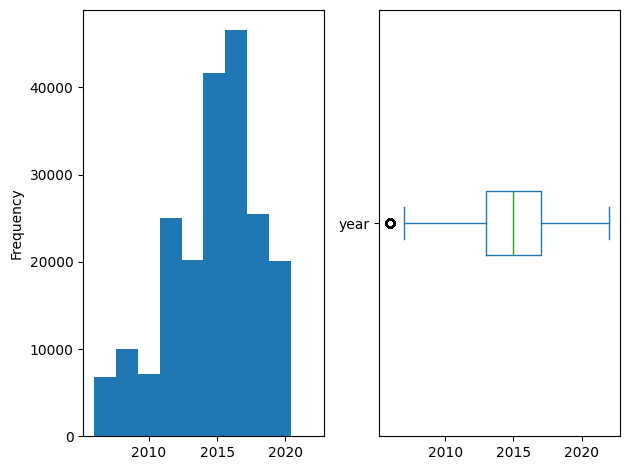

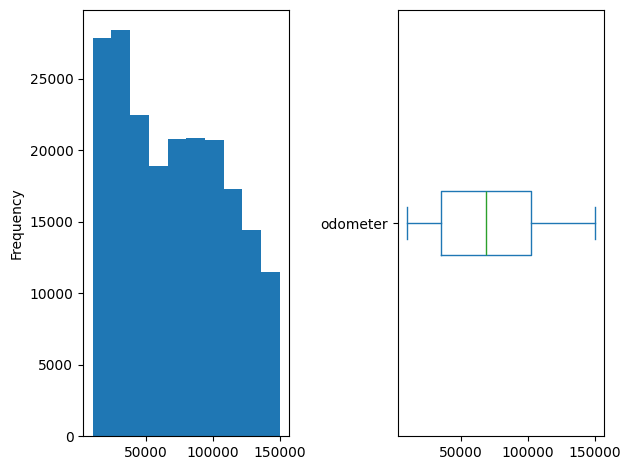

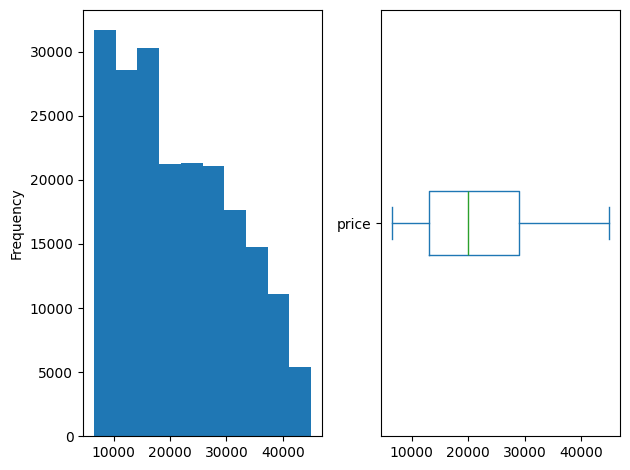

In [26]:
#numerical_features = df.select_dtypes(include=['int64','float64']).columns
numerical_features = ['year','odometer','price']

for att in numerical_features:
 plt.subplot(1,2,1)
 df_numeric[att].plot.hist()
 plt.subplot(1,2,2)
 df_numeric[att].plot.box(vert=False)
 plt.tight_layout()
 #plt.savefig('{}.png'.format(att), dpi=600)
 plt.show()

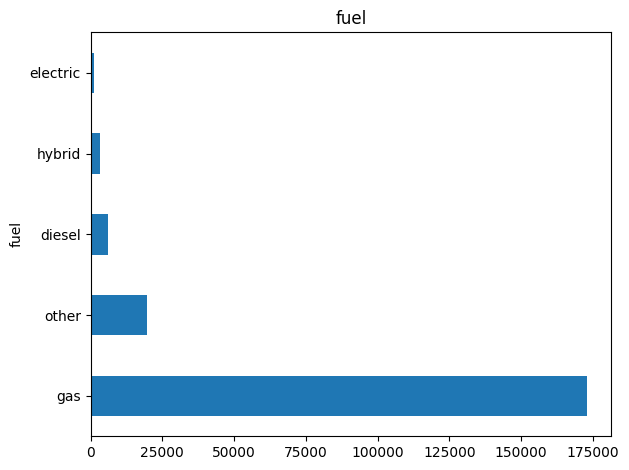

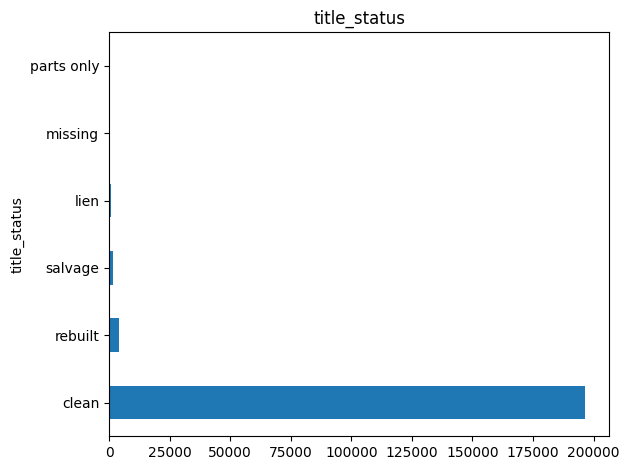

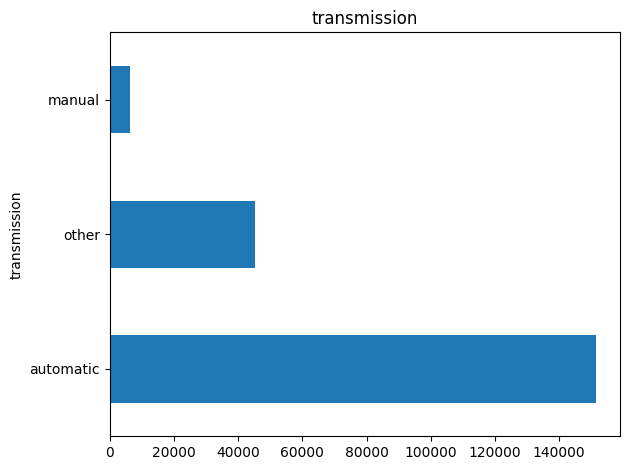

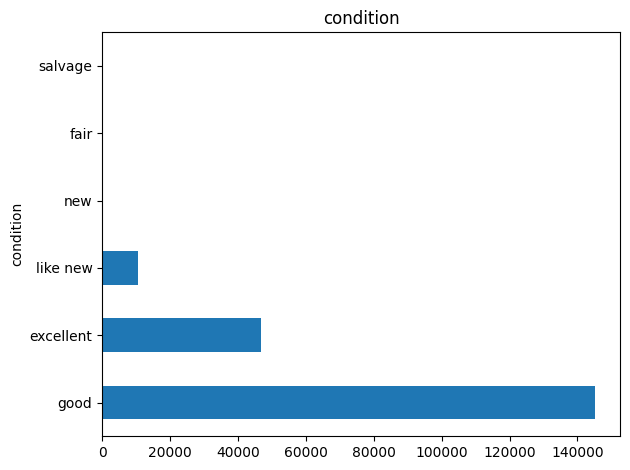

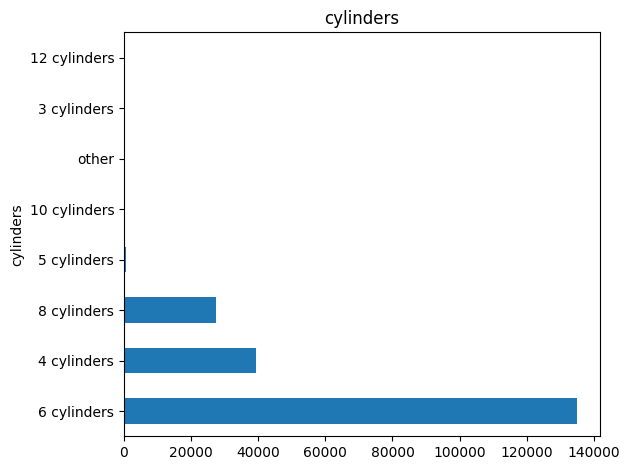

In [27]:
#categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = ['fuel','title_status','transmission','condition','cylinders']
for att in categorical_features:
    df[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    #plt.savefig('{}.png'.format(att), dpi=600)
    plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [22]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop(columns=['price'],axis=1), df_numeric['price'], test_size=0.2, random_state=42)

In [23]:
X_train.head()

,year,odometer
160922,2015,103669
94822,2012,41883
27369,2015,64616
171933,2018,48899
149363,2016,25918


In [24]:
#standardize and scale Train and Test numerical data
scaler_x = StandardScaler()
df_scaled_x_train = scaler_x.fit_transform(X_train)
df_scaled_x_test = scaler_x.transform(X_test)

# Target variable scaling
scaler_y = StandardScaler()
df_scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
df_scaled_y_test = scaler_y.transform(y_test.values.reshape(-1,1))

# Linear Regression with 2 features (year, odometer)

In [25]:
# Model 1 : Linear Regression with 2 features (year, odometer)
model1_train_mse = ''
model1_test_mse = ''

X = df_scaled_x_train
y = df_scaled_y_train

linreg = LinearRegression(fit_intercept = False).fit(X, y)
model1_train_mse = mean_squared_error(linreg.predict(X),y)
model1_test_mse = mean_squared_error(linreg.predict(df_scaled_x_test),df_scaled_y_test)

print(linreg)
print(model1_train_mse)
print(model1_test_mse)

LinearRegression(fit_intercept=False)
0.6922398137428262
0.6880111324033108


In [26]:
# Model1 predictions for plotting
df_model1_pred = X_test.copy()
df_model1_pred['pred_price1'] = scaler_y.inverse_transform(linreg.predict(df_scaled_x_test))
df_model1_pred['actual_price'] = y_test

In [27]:
# Predicting my car value
data= {'year': [2014], 'odometer': [153000]}
df_xx = pd.DataFrame(data)

# Scale my car data using the same scaler used for training data
xx_scaled = scaler_x.transform(df_xx)

# Predict my car value using the trained model
mycarvalue_scaled = linreg.predict(xx_scaled)

# Inverse transform the prediction to get the original scale (if target variable was scaled)
mycarvalue = scaler_y.inverse_transform(mycarvalue_scaled.reshape(-1, 1))
print("Predicted value:", mycarvalue)


Predicted value: [[14288.02130163]]


In [28]:
df_model1_pred.sample(10)

,year,odometer,pred_price1,actual_price
75543,2013,88750,18405.724320,21590
148916,2011,62255,18656.265087,28990
69943,2014,107423,17855.750378,12000
46477,2016,29000,25818.102060,39995
172649,2013,136089,14700.067372,8995
101925,2018,50123,25988.076917,17988
5795,2019,14789,29665.725333,22995
28655,2018,25050,27950.770186,43950
108024,2013,112098,16578.062594,10995
92067,2012,116985,15283.779630,19700


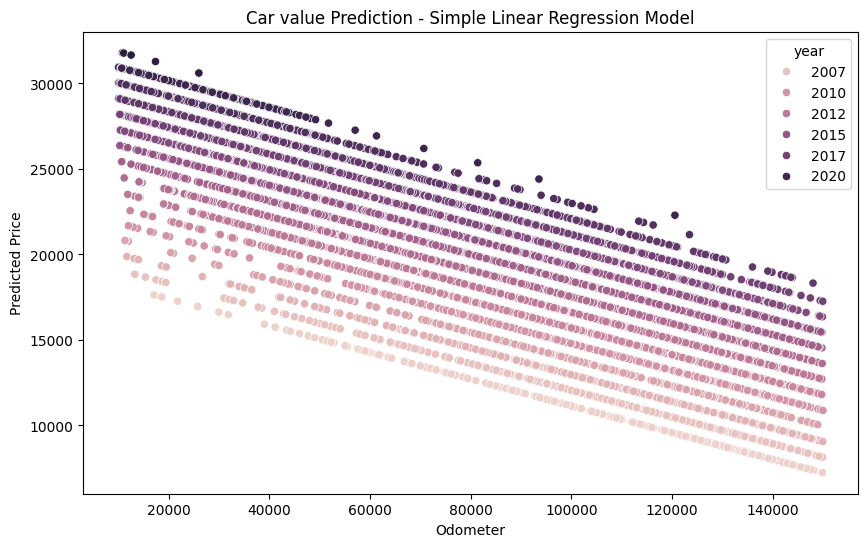

In [36]:
# Nice graphical representation of odometer impact on older and newer cars
plt.figure(figsize=(10, 6))
log_value = np.log(df_model1_pred['actual_price'])
sns.scatterplot(data=df_model1_pred,x='odometer',y='pred_price1', hue='year')
plt.title('Car value Prediction - Simple Linear Regression Model')
plt.ylabel('Predicted Price')
plt.xlabel('Odometer')
plt.show()

In [35]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,4wd,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,4wd,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,4wd,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,4wd,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al


#Cross-validation numerical features(Model1) using SequentialFeatureSelector and CV on Train/Test Indices

In [37]:
# Parameter to pass to np.split(train/test 80:20 ratio)
all_indices = np.arange(df_numeric.shape[0])
seed(42)
shuffle(all_indices)
train_indices, test_indices = np.split(all_indices, [int(df_numeric.shape[0]*.80)])

In [38]:
X = df_numeric.drop(columns=['price'],axis=1)
y = df_numeric['price']

In [49]:
selector = SequentialFeatureSelector(LinearRegression(), direction = 'backward', cv=[[train_indices, test_indices]])
Xt= selector.fit_transform(X,y)
print(Xt.shape)

(87592, 1)


In [50]:
# Based on SFS, it seems only 'year' is good enough for the model
lr = LinearRegression().fit(Xt,y)
model_preds = lr.predict(Xt)
mse = mean_squared_error(y,model_preds)
print(mse)
# Only slight improvement compared to linear Regression above

72369460.41197959


# Ridge Regression Model - Numerical Features (Year, Odometer) and Alpha values (1-100)

In [51]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop(columns=['price'],axis=1), df_numeric['price'], test_size=0.2, random_state=42)

In [53]:
model_r_coefs = []
#Apply Ridge Model
for i in range(1,101):
  model_r = Ridge(alpha=i).fit(X_train,y_train)
  model_r_coefs.append(list(model_r.coef_))


model_r_train_mse = mean_squared_error(y_train,model_r.predict(X_train))
model_r_test_mse = mean_squared_error(y_test,model_r.predict(X_test))
print(model_r_train_mse)
print(model_r_test_mse)
pd.DataFrame(model_r_coefs).rename(columns={0:'year',1:'odometer'})
# As you may notice the model complexity is getting reduced as we increase the alpha parameter

66715854.17542116
66308226.0611658


,year,odometer
0,911.730839,-0.078279
1,911.728948,-0.078279
2,911.727056,-0.078279
3,911.725165,-0.078280
4,911.723273,-0.078280
...,...,...
95,911.551183,-0.078289
96,911.549292,-0.078289
97,911.547401,-0.078289
98,911.545510,-0.078289


#Ridge Regression Model - Numerical Features (Year, Odometer) and Alpha values (1-100) and using GRIDSearchCV to find best hyperparameter alpha.

In [54]:
# Parameter to pass to np.split(train/test 80:20 ratio)
all_indices = np.arange(df_numeric.shape[0])
seed(42)
shuffle(all_indices)
train_indices, test_indices = np.split(all_indices, [int(df_numeric.shape[0]*.80)])

In [55]:
#Select Ridge model
Scaled_ridge_model = Pipeline([
                     ('r_transform',PolynomialFeatures(degree=3,include_bias = False)),
                     ('scale', StandardScaler()),
                     ('r_ridge', Ridge())
                              ])

In [56]:
parameters_to_try = {'r_ridge__alpha':np.linspace(1,100,100)}
#parameters_to_try

In [57]:
model_finder = GridSearchCV(estimator=Scaled_ridge_model,
                            param_grid=parameters_to_try,
                            cv=[[train_indices,test_indices]],
                            scoring='neg_mean_squared_error')

In [58]:
model_finder.fit(df_numeric.drop(columns=['price'],axis=1),df_numeric['price'])
best_model = model_finder.best_estimator_
print(best_model)

Pipeline(steps=[('r_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scale', StandardScaler()), ('r_ridge', Ridge())])


In [59]:
print(best_model.named_steps["r_ridge"].coef_)
print(best_model.named_steps["r_ridge"].alpha)

[-29661.51944369 -25278.70896869    931.58066309   -508.56298188
 -15811.59332597  31488.0668388   24577.50031181   7390.97779475
   6762.3764854 ]
1.0


In [168]:
model_finder.cv_results_

#Lasso Regression Model - Numerical Features (Year, Odometer) with standardization using Scaler

In [60]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop(columns=['price'],axis=1), df_numeric['price'], test_size=0.2, random_state=42)

In [61]:
auto_pipe = ''

auto_pipe = Pipeline([('polyfeatures',PolynomialFeatures(degree=3,include_bias = False)),
                     ('scaler', StandardScaler()),
                     ('lasso',Lasso())])

auto_pipe.fit(X_train,y_train)

lasso_train_mse = mean_squared_error(y_train,auto_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test,auto_pipe.predict(X_test))


print(lasso_train_mse)
print(lasso_test_mse)
auto_pipe

66130206.603414
65801827.082749404


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.184e+11, tolerance: 6.753e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()), ('lasso', Lasso())])

#Model 2 : Linear Regression with OneHotEncoder (cylinders) and ordinalcoder (condition) and polynominal features (2) on numerical features

In [64]:
features = ['year','odometer','cylinders','condition']
df[features]["condition"].value_counts()

,count
condition,
good,62143
excellent,20874
like new,4388
new,103
fair,55
salvage,29


In [70]:
#Train test split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], test_size=0.2, random_state=42)

In [71]:
# Use onehotEncoder, OrdinalEncoder and Polynominal Features
poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree=2), make_column_selector(dtype_include=np.number)),
                                           (OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent','like new', 'new']]), ['condition']),
                                               (OneHotEncoder(drop = 'if_binary'), ['cylinders']))

In [72]:
#fit and predict
pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])
pipe.fit(X_train[features], y_train)
p1 = pipe.predict(X_train[features])
p2 = pipe.predict(X_test[features])
model2_train_mse = mean_squared_error(y_train,p1)
model2_test_mses = mean_squared_error(y_test,p2)

# Answer check
print(model2_train_mse)
print(model2_test_mses)
pipe

48880292.09100207
48335495.11685542


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7642745330>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['cylinders'])])),
                ('linreg', LinearRegression())])

In [73]:
# Model2 predictions
df_model2_pred = X_test.copy()
df_model2_pred['pred_price2'] = pipe.predict(X_test[features])
df_model2_pred['actual_price'] = y_test

In [74]:
df_model2_pred.sample(10)

,year,odometer,cylinders,condition,pred_price2,actual_price
131987,2014,117314,8 cylinders,good,25967.141680,23495
155746,2013,69610,6 cylinders,excellent,18803.280303,10995
133192,2014,115268,8 cylinders,excellent,25288.785972,29999
58797,2007,124000,6 cylinders,good,10190.793183,9500
152194,2006,96626,4 cylinders,good,5377.445561,27490
127469,2017,135438,6 cylinders,good,22228.745648,23995
82472,2015,80775,4 cylinders,excellent,13897.392927,16995
156001,2019,55292,4 cylinders,good,21657.071927,19900
149888,2018,34650,6 cylinders,like new,26511.653681,38500
27578,2015,85739,4 cylinders,good,14374.736006,8999


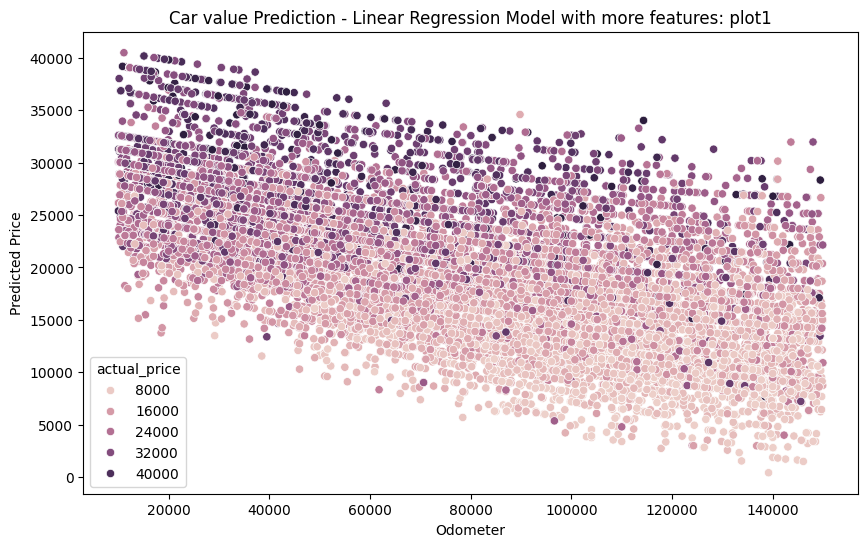

In [85]:
# Nice graphical representation of all features
plt.figure(figsize=(10, 6))
log_value = np.log(df_model2_pred['actual_price'])
sns.scatterplot(data=df_model2_pred,x='odometer',y='pred_price2', hue='actual_price')
plt.title('Car value Prediction - Linear Regression Model with more features: plot1')
plt.ylabel('Predicted Price')
plt.xlabel('Odometer')
plt.show()

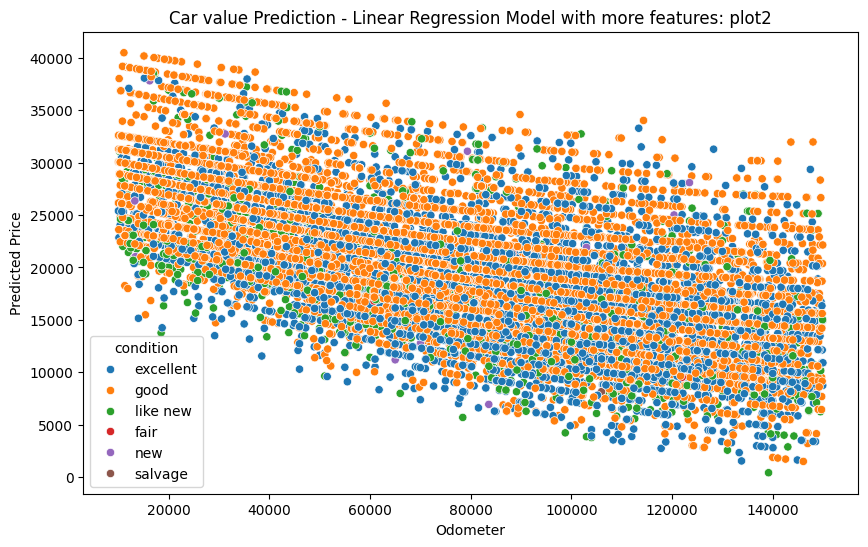

In [86]:
# Nice graphical representation of all features
plt.figure(figsize=(10, 6))
log_value = np.log(df_model2_pred['actual_price'])
sns.scatterplot(data=df_model2_pred,x='odometer',y='pred_price2', hue='condition')
plt.title('Car value Prediction - Linear Regression Model with more features: plot2')
plt.ylabel('Predicted Price')
plt.xlabel('Odometer')
plt.show()

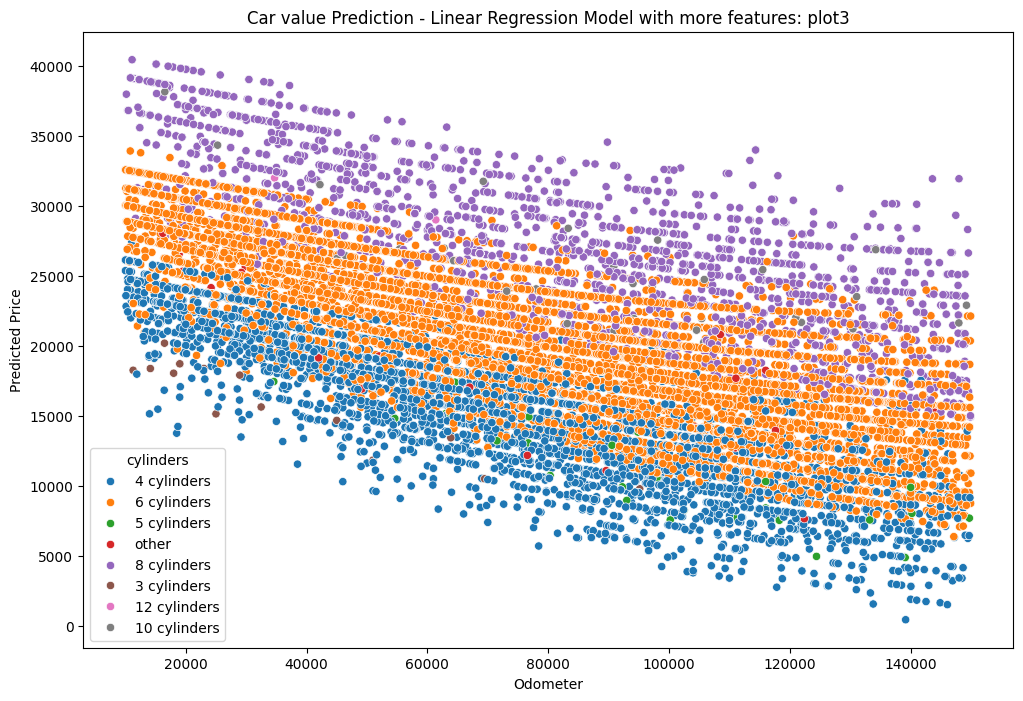

In [91]:
# Nice graphical representation of all features
plt.figure(figsize=(12, 8))
log_value = np.log(df_model2_pred['actual_price'])
sns.scatterplot(data=df_model2_pred,x='odometer',y='pred_price2', hue='cylinders')
plt.title('Car value Prediction - Linear Regression Model with more features: plot3')
plt.ylabel('Predicted Price')
plt.xlabel('Odometer')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Based on model evaluation, the linear regression model with features like 'year', 'odometer', 'condition', 'cylinders' shown good model performance and lower MSE**


**Linear Regression model (Numerical Features - Year, Odometer)**   

    * Train_scaled MSE:  0.6922398137428262
    * Test_scaled  MSE:  0.6880111324033108

**Ridge Regression model (Numerical Features - Year, Odometer) & Alpha = 1-100**

    * Train_scaled MSE:  66715854.17542116
    * Test_scaled  MSE:  66308226.0611658

 **Lasso Regression model (Numerical Features - Year, Odometer) with standardScaler**   

    * Train_scaled MSE:  66130206.603414
    * Test_scaled  MSE:  65801827.082749404

**Linear Regression model with OneHotEncoder (cylinders) and ordinalcoder (condition) and polynominal features (2) on numerical features (Year, Odometer)**

    * Train_scaled MSE:  48880292.09100207
    * Test_scaled  MSE:  48335495.11685542

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Dear Mr. Kurt,

Based on extensive data analysis of user car data, machine learning modeling, predictions, we are able to infer that the following 4 features are very important for customers of used cars. so you may adjust your car inventory accordingly and let us know if you have any other questions.

**Below are the important features valued by customers:**

1. Odometer reading

2. Year of Car

3. Condition of the car

4. Number of Cylinders

**Key notes to consider:**

The **'odometer'** should be as low as possible

The **'year'** should be as latest as possible

The **'condition'** should be in excellent, good or like-new for better value

The **'cylinders'** should be 8, 6 or 4 as valued by customers
